In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/Q2.csv")
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 16 entries, Survey Year to Why or why not_Mental?
dtypes: float64(1), int64(2), object(13)
memory usage: 197.2+ KB


In [4]:
df.head(-5)

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Would you bring up your mental health with a potential employer in an interview?,Why or why not_Mental?
0,2017,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,No,I'd be worried they wouldn't hire me
1,2017,0,100-500,1.0,1.0,Yes,Yes,31.0,Male,United Kingdom,NaN,NaN,United Kingdom,NaN,No,mental health issues are stigmatised and misun...
2,2017,0,6-25,1.0,1.0,I don't know,No,36.0,Male,United States of America,Missouri,White,United States of America,Missouri,No,stigma
3,2017,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,No,Might hurt my chances
4,2017,0,100-500,1.0,0.0,Yes,No,30.0,Male,United States of America,California,White,United States of America,California,No,It wouldn't feel safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,2021,0,26-100,0.0,1.0,NaN,No,45.0,Male,United States of America,Florida,White,United States of America,Florida,No,I feel like that is frowned upon and looked at...
1568,2021,0,100-500,0.0,1.0,NaN,Yes,30.0,Female,United States of America,New York,Black or African American,United States of America,New York,No,Same as above
1569,2021,0,More than 1000,0.0,0.0,NaN,No,22.0,Female,India,NaN,NaN,India,NaN,No,I like to keep my personal information discree...
1570,2021,0,6-25,1.0,1.0,NaN,NaN,28.0,Male,Italy,NaN,NaN,Italy,NaN,Yes,Mental helath is as important as physical heal...


In [14]:
len(df.iloc[:,-2].notna())

1577

Is your employer primarily a tech company/organization?

In [36]:
df.iloc[:,3].unique()

array(['1.0', '0.0'], dtype=object)

In [37]:
df = df[df['Is your employer primarily a tech company/organization?'].notna()]

In [38]:
df.iloc[:,3] = df.iloc[:,3].replace({'True':'1.0', 'False':'0.0'})

In [39]:
df.iloc[:,3].unique()

array(['1.0', '0.0'], dtype=object)

In [40]:
df = df[df['Is your primary role within your company related to tech/IT?'].notna()]

In [41]:
df.iloc[:,4] = df.iloc[:,4].replace({'True':'1.0', 'False':'0.0'})

In [42]:
df.iloc[:,4].unique()

array(['1.0', '0.0'], dtype=object)

In [43]:
df["Is your employer primarily a tech company/organization?"].value_counts(normalize=True)*100

1.0    72.669626
0.0    27.330374
Name: Is your employer primarily a tech company/organization?, dtype: float64

In [44]:
df_Tech = df[df.iloc[:,3] == '1.0']
df_NonTech = df[df.iloc[:,3] == '0.0']

In [45]:
df_Tech.iloc[:,-2]

0          No
1          No
2          No
3          No
4          No
        ...  
1571       No
1573    Maybe
1574       No
1575       No
1576       No
Name: Would you bring up your mental health with a potential employer in an interview?, Length: 1146, dtype: object

In [46]:
df_Tech.iloc[:,-2].value_counts()

No       782
Maybe    291
Yes       73
Name: Would you bring up your mental health with a potential employer in an interview?, dtype: int64

In [21]:
df_Tech["Would you bring up your mental health with a potential employer in an interview?"].value_counts(normalize=True)*100

No       69.116081
Maybe    24.281150
Yes       6.602769
Name: Would you bring up your mental health with a potential employer in an interview?, dtype: float64

In [32]:
print(df_Tech['What is your gender?'].value_counts(normalize=True)*100)
print(df_NonTech['What is your gender?'].value_counts(normalize=True)*100)

Male      64.110756
Female    31.522897
Other      4.366347
Name: What is your gender?, dtype: float64
Male      63.772455
Female    33.233533
Other      2.994012
Name: What is your gender?, dtype: float64


# "Yes" to Bring Up Mental Health Issues

In [54]:
#Q2.1: Yes to "Bring up Mental Health Issue"
df_Tech_Y = df_Tech.loc[df['Would you bring up your mental health with a potential employer in an interview?'] == 'Yes','Why or why not_Mental?']
print('length of df: ',len(df_Tech_Y))
print('number of missing value: ', df_Tech_Y.isnull().sum())
df_Tech_Y_mod = df_Tech_Y.dropna()
print('length of df after dropping missing values: ',len(df_Tech_Y_mod))

length of df:  73
number of missing value:  15
length of df after dropping missing values:  58


In [55]:
Q1_Tech_Y = df_Tech_Y_mod.tolist()
Q1_Tech_Y

['Honesty',
 'Would be viewed as detrimental to chance of employment',
 'Because I do not want to work anywhere that does not take mental health into account.',
 'I say yes, but the extent depends on the employer. Also there\'s a difference between this question and the last. The last says "mental health" which I\'m happy to bring up as I can use the speaking about self-care as a bridge (plus I want to make sure that I won\'t be expected to work 10+ hours per day). As for a specific mental health issue, as this question is asking, the answer would likely be no -- unless the potential employer has read some of my writing about it.',
 'Knowing is half the battle',
 "I work remotely, which requires a coherent effort from both sides to make it work. My mental health is very relevant for whether that setup can work, both from my side and in terms of the proper support from theirs. It's such a significant factor that concealing a potential issue would feel dishonest.",
 'Mental health affect

In [56]:
import string
#import packages from nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist
#import gensim and packages
import gensim
from gensim import corpora

In [57]:
#check the most frequent words in Yes answers of Q1
NLTK_stopwords = stopwords.words('english')

text = [word for line in Q1_Tech_Y for word in line.split() if word not in NLTK_stopwords]
fdist = FreqDist(text)
k = 20
top_k_words, _ = zip(*fdist.most_common(k))
print(top_k_words)

('I', 'would', 'work', 'health', 'If', 'mental', 'want', 'think', 'employer', 'work.', 'know', 'get', 'job', 'like', 'part', 'bring', 'work,', 'need', "I'm", 'issue')


In [58]:
#create a custom stopwords list
custom_stopwords = ['I', 'would', 'work', 'health', 'If', 
                    'mental', 'want', 'think', 'employer', 
                    'work.', 'know', 'get', 'job', 'like', 'part',
                    'bring', 'work,', 'need', "I'm", 'issue']

stop = NLTK_stopwords + custom_stopwords

In [59]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

generate a wordcloud to see the most frequent used words

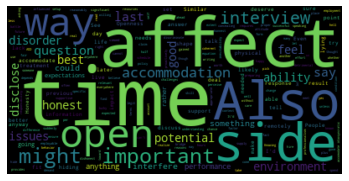

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text2 = " ".join(i for i in Q1_Tech_Y)
wordcloud2 = WordCloud(stopwords = stop).generate(text2)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud2.png')
plt.show()

Use Gensim that leverages LDA model to discover topics

In [61]:
#define a function to remove punctuations and lemmatize words
#stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

#Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [62]:
#get a cleaned document
doc_clean_Q1Y_Tech = [clean(doc).split() for doc in Q1_Tech_Y]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q1Y_Tech = corpora.Dictionary(doc_clean_Q1Y_Tech)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q1Y_Tech = [dictionary_Q1Y_Tech.doc2bow(doc) for doc in doc_clean_Q1Y_Tech]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q1Y_Tech = Lda(doc_term_matrix_Q1Y_Tech, num_topics=2, id2word = dictionary_Q1Y_Tech, passes=50)

In [63]:
print(ldamodel_Q1Y_Tech.print_topics(num_topics=2, num_words=5))

[(0, '0.014*"affect" + 0.012*"time" + 0.012*"accommodation" + 0.012*"might" + 0.009*"there"'), (1, '0.011*"im" + 0.011*"important" + 0.011*"side" + 0.011*"open" + 0.009*"way"')]


Since we're analyzing detailed explanations as to why they would bring up a physical issue during an interview, we could infer that the three most important topics are:
1. They need specific accommodations for their physical needs.
2. Stigmas related to the physical health conditions. 
3. How physical health issue affect their work.

Use SpaCy to discover what the answers are talking about

reference: http://robertorocha.info/using-nlp-to-analyze-open-ended-responses-in-surveys/

In [64]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1850000

In [65]:
type(df_Tech_Y)

pandas.core.series.Series

In [66]:
df_Tech_Y = df_Tech_Y.to_frame()

In [67]:
df_Tech_Y.to_csv('Yes Answers in Tech_Mental.csv', index=False)

In [68]:
df_Tech_Y = df_Tech_Y.dropna()

In [69]:
all_text_Tech_Y = df_Tech_Y["Why or why not_Mental?"].str.cat(sep = ' ')

In [70]:
doc_Tech_Y = nlp(all_text_Tech_Y, disable = ['ner'])

In [71]:
from collections import Counter

words = [token.lemma_ for token in doc_Tech_Y if not token.is_stop and not token.is_punct] 
word_freq = Counter(words) 
word_freq.most_common(20)

[('work', 27),
 ('mental', 17),
 ('health', 17),
 ('want', 11),
 (' ', 11),
 ('need', 11),
 ('know', 10),
 ('issue', 9),
 ('employer', 8),
 ('think', 8),
 ('affect', 7),
 ('time', 7),
 ('good', 6),
 ('job', 6),
 ('like', 6),
 ('bring', 5),
 ('feel', 4),
 ('open', 4),
 ('disclose', 4),
 ('way', 4)]

In [72]:
from spacy.matcher import Matcher 

matcher = Matcher(nlp.vocab) 
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
matcher.add('ADJ_PHRASE', [pattern]) 

matches = matcher(doc_Tech_Y, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)

phrase_freq.most_common(10)

[('mental health', 14),
 ('potential employer', 2),
 ('physical health', 2),
 ('coherent effort', 1),
 ('proper support', 1),
 ('significant factor', 1),
 ('potential issue', 1),
 ('best policy', 1),
 ('mental condition', 1),
 ('right side', 1)]

In [20]:
feel_adj = []
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'OP': '?'}, 
  {'LOWER': {'IN' : ['feel', 'am', "'m", 'are', "'re"]}}, 
  {'OP': '?'}, {'OP': '?'}, {'POS':'ADJ'}]
matcher.add("FeelAdj", [pattern]) 
matches = matcher(doc, as_spans=True) 
for span in matches:
    feel_adj.extend([token.lemma_ for token in span if token.pos_ == 'ADJ'])
Counter(feel_adj).most_common(20)

[('physical', 3),
 ('aware', 2),
 ('comfortable', 2),
 ('most', 2),
 ('afraid', 2),
 ('non', 2),
 ('ashamed', 1),
 ('adequate', 1),
 ('lucky', 1),
 ('open', 1),
 ('mental', 1),
 ('allergic', 1),
 ('tech', 1),
 ('-', 1),
 ('diabetic', 1),
 ('fit', 1),
 ('impaired', 1),
 ('able', 1),
 ('less', 1)]

In [35]:
want_adj = []
matcher = Matcher(nlp.vocab) 
pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'IS_ALPHA':True, 'OP':'?'},
   {'LOWER': {'IN' : ['think', 'need']}}, {'IS_ALPHA':True, 'OP':'?'},
   {'IS_ALPHA':True, 'OP':'?'}, {'POS':'NOUN'}]
   
matcher.add("WantPhrase", [pattern]) 
matches = matcher(doc_Tech_Y, as_spans=True)

for span in matches:
    want_adj.extend([token.lemma_ for token in span if token.pos_ == 'ADJ'])
Counter(want_adj).most_common(20)

[]

In [75]:
from spacy.matcher import PhraseMatcher
mental_health_colloc = []
matcher = PhraseMatcher(nlp.vocab, attr = 'LOWER') 
# The attr above ensures all instances are converted to lower-case so the search is case-insensitive
pattern = [nlp.make_doc('time')]
matcher.add('time', pattern) 
matches = matcher(doc_Tech_Y)
for match_id, start, end in matches:
    span = doc_Tech_Y[start-10 : end+10]   
    mental_health_colloc.extend([token.lemma_.lower() for token in span if not token.is_stop and not token.is_punct]) 
Counter(mental_health_colloc).most_common(20)

[('time', 7),
 ('work', 4),
 ('mental', 2),
 ('health', 2),
 ('way', 2),
 ('offer', 2),
 ('phase', 2),
 ('condition', 1),
 ('worth', 1),
 ('people', 1),
 ('open', 1),
 ('physical', 1),
 ('question', 1),
 ('real', 1),
 ('feel', 1),
 ('like', 1),
 ('disorder', 1),
 ('shape', 1),
 ('well', 1),
 ('information', 1)]

Rule-Based Sentiment Analysis in Python

reference: https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/

In [76]:
df_Tech_Y

,Why or why not_Mental?
21,Honesty
53,Would be viewed as detrimental to chance of em...
103,Because I do not want to work anywhere that do...
107,"I say yes, but the extent depends on the emplo..."
118,Knowing is half the battle
180,"I work remotely, which requires a coherent eff..."
269,Mental health affects my ability to work. I wo...
278,"Openness is the best policy, if you don't get..."
336,People should be open about it
339,Same. Wouldn’t want to hide.


In [77]:
#remove all special characters and numericals 
import re
def cleanse(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

df_Tech_Y['Cleaned Answers'] = df_Tech_Y['Why or why not_Mental?'].apply(cleanse)
df_Tech_Y.head(5)

,Why or why not_Mental?,Cleaned Answers
21,Honesty,Honesty
53,Would be viewed as detrimental to chance of em...,Would be viewed as detrimental to chance of em...
103,Because I do not want to work anywhere that do...,Because I do not want to work anywhere that do...
107,"I say yes, but the extent depends on the emplo...",I say yes but the extent depends on the employ...
118,Knowing is half the battle,Knowing is half the battle


In [78]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet


#POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in stop:
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df_Tech_Y['POS tagged'] = df_Tech_Y['Cleaned Answers'].apply(token_stop_pos)
df_Tech_Y.head(5)


,Why or why not_Mental?,Cleaned Answers,POS tagged
21,Honesty,Honesty,"[(Honesty, n)]"
53,Would be viewed as detrimental to chance of em...,Would be viewed as detrimental to chance of em...,"[(viewed, v), (detrimental, n), (chance, n), (..."
103,Because I do not want to work anywhere that do...,Because I do not want to work anywhere that do...,"[(anywhere, r), (take, v), (account, n)]"
107,"I say yes, but the extent depends on the emplo...",I say yes but the extent depends on the employ...,"[(say, v), (yes, r), (extent, n), (depends, v)..."
118,Knowing is half the battle,Knowing is half the battle,"[(Knowing, n), (half, None), (battle, n)]"


In [79]:
df_Tech_Y[['POS tagged']]

,POS tagged
21,"[(Honesty, n)]"
53,"[(viewed, v), (detrimental, n), (chance, n), (..."
103,"[(anywhere, r), (take, v), (account, n)]"
107,"[(say, v), (yes, r), (extent, n), (depends, v)..."
118,"[(Knowing, n), (half, None), (battle, n)]"
180,"[(remotely, r), (requires, v), (coherent, a), ..."
269,"[(affects, n), (ability, n), (environment, n),..."
278,"[(Openness, n), (best, a), (policy, n), (condi..."
336,"[(People, n), (open, a)]"
339,"[(hide, v)]"


In [80]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_ans = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_ans = lemma_ans + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_ans = lemma_ans + " " + lemma
    return lemma_ans

df_Tech_Y['Lemma'] = df_Tech_Y['POS tagged'].apply(lemmatize)
df_Tech_Y.head(5)

,Why or why not_Mental?,Cleaned Answers,POS tagged,Lemma
21,Honesty,Honesty,"[(Honesty, n)]",Honesty
53,Would be viewed as detrimental to chance of em...,Would be viewed as detrimental to chance of em...,"[(viewed, v), (detrimental, n), (chance, n), (...",view detrimental chance employment
103,Because I do not want to work anywhere that do...,Because I do not want to work anywhere that do...,"[(anywhere, r), (take, v), (account, n)]",anywhere take account
107,"I say yes, but the extent depends on the emplo...",I say yes but the extent depends on the employ...,"[(say, v), (yes, r), (extent, n), (depends, v)...",say yes extent depend Also difference questi...
118,Knowing is half the battle,Knowing is half the battle,"[(Knowing, n), (half, None), (battle, n)]",Knowing half battle


In [81]:
df_Tech_Y[['Why or why not_Mental?','Lemma']]

,Why or why not_Mental?,Lemma
21,Honesty,Honesty
53,Would be viewed as detrimental to chance of em...,view detrimental chance employment
103,Because I do not want to work anywhere that do...,anywhere take account
107,"I say yes, but the extent depends on the emplo...",say yes extent depend Also difference questi...
118,Knowing is half the battle,Knowing half battle
180,"I work remotely, which requires a coherent eff...",remotely require coherent effort side make r...
269,Mental health affects my ability to work. I wo...,affect ability environment supportive provid...
278,"Openness is the best policy, if you don't get...",Openness best policy condition worth time
336,People should be open about it,People open
339,Same. Wouldn’t want to hide.,hide


In [82]:
from textblob import TextBlob

def getSubjectivity(answer):
    return TextBlob(answer).sentiment.subjectivity

def getPolarity(answer):
    return TextBlob(answer).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [83]:
final_df = pd.DataFrame(df_Tech_Y[['Why or why not_Mental?', 'Lemma']])

In [84]:
type(final_df['Lemma'])

pandas.core.series.Series

In [85]:
final_df['Subjectivity'] = final_df['Lemma'].apply(getSubjectivity)
final_df['Polarity'] = final_df['Lemma'].apply(getPolarity) 
final_df['Analysis'] = final_df['Polarity'].apply(analysis)
final_df.head(5)

#apply(lambda x: get_tweet_sentiment(' '.join(x)))

,Why or why not_Mental?,Lemma,Subjectivity,Polarity,Analysis
21,Honesty,Honesty,0.000000,0.000000,Neutral
53,Would be viewed as detrimental to chance of em...,view detrimental chance employment,0.000000,0.000000,Neutral
103,Because I do not want to work anywhere that do...,anywhere take account,0.000000,0.000000,Neutral
107,"I say yes, but the extent depends on the emplo...",say yes extent depend Also difference questi...,0.592460,0.185714,Positive
118,Knowing is half the battle,Knowing half battle,0.166667,-0.166667,Negative


In [86]:
tb_counts = final_df.Analysis.value_counts()
tb_counts

Positive    28
Neutral     25
Negative     5
Name: Analysis, dtype: int64

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(answer):
    vs = analyzer.polarity_scores(answer)
    return vs['compound']
    
final_df['Vader Sentiment'] = final_df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
final_df['Vader Analysis'] = final_df['Vader Sentiment'].apply(vader_analysis)
final_df.head(5)



,Why or why not_Mental?,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
21,Honesty,Honesty,0.000000,0.000000,Neutral,0.4939,Neutral
53,Would be viewed as detrimental to chance of em...,view detrimental chance employment,0.000000,0.000000,Neutral,0.2500,Neutral
103,Because I do not want to work anywhere that do...,anywhere take account,0.000000,0.000000,Neutral,0.0000,Neutral
107,"I say yes, but the extent depends on the emplo...",say yes extent depend Also difference questi...,0.592460,0.185714,Positive,0.8979,Positive
118,Knowing is half the battle,Knowing half battle,0.166667,-0.166667,Negative,-0.3818,Neutral


In [88]:
vader_counts = final_df['Vader Analysis'].value_counts()
vader_counts

Neutral     44
Positive    12
Negative     2
Name: Vader Analysis, dtype: int64

In [89]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
   
    for word, pos in pos_data:
        if not pos:
            continue
        form = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not form:
            continue
        synsets = wordnet.synsets(form, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
            # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"

final_df['SWN analysis'] = df_Tech_Y['POS tagged'].apply(sentiwordnetanalysis)
final_df.head(5)

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/snowe/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


,Why or why not_Mental?,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
21,Honesty,Honesty,0.000000,0.000000,Neutral,0.4939,Neutral,Positive
53,Would be viewed as detrimental to chance of em...,view detrimental chance employment,0.000000,0.000000,Neutral,0.2500,Neutral,Positive
103,Because I do not want to work anywhere that do...,anywhere take account,0.000000,0.000000,Neutral,0.0000,Neutral,Neutral
107,"I say yes, but the extent depends on the emplo...",say yes extent depend Also difference questi...,0.592460,0.185714,Positive,0.8979,Positive,Neutral
118,Knowing is half the battle,Knowing half battle,0.166667,-0.166667,Negative,-0.3818,Neutral,Negative


In [90]:
swn_counts= final_df['SWN analysis'].value_counts()
swn_counts

Neutral     27
Positive    21
Negative     8
Name: SWN analysis, dtype: int64

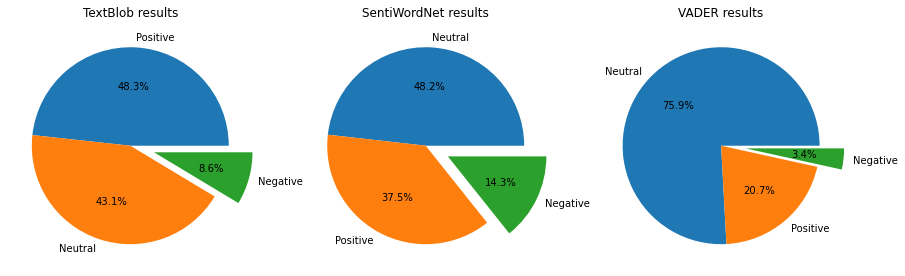

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,2)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.subplot(1,3,3)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.show()

# "No" to Bring Up Mental Health Issues

In [93]:
df_Tech

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Would you bring up your mental health with a potential employer in an interview?,Why or why not_Mental?
0,2017,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,No,I'd be worried they wouldn't hire me
1,2017,0,100-500,1.0,1.0,Yes,Yes,31.0,Male,United Kingdom,NaN,NaN,United Kingdom,NaN,No,mental health issues are stigmatised and misun...
2,2017,0,6-25,1.0,1.0,I don't know,No,36.0,Male,United States of America,Missouri,White,United States of America,Missouri,No,stigma
3,2017,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,No,Might hurt my chances
4,2017,0,100-500,1.0,0.0,Yes,No,30.0,Male,United States of America,California,White,United States of America,California,No,It wouldn't feel safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2021,0,More than 1000,1.0,1.0,NaN,No,37.0,Male,Italy,NaN,NaN,Italy,NaN,No,Same reason seen for physical health issue
1573,2021,0,6-25,1.0,1.0,NaN,Yes,46.0,Male,United States of America,Indiana,White,United States of America,Indiana,Maybe,Only if it were relevant to the job
1574,2021,0,26-100,1.0,1.0,NaN,No,33.0,Male,Germany,NaN,NaN,Germany,NaN,No,I cannot see the point of bringing it during t...
1575,2021,0,100-500,1.0,1.0,NaN,NaN,49.0,Male,Portugal,NaN,NaN,Portugal,NaN,No,If can affect my work and I don't know how emp...


In [94]:
#Q1.1: No to "Bring up Physical Health Issue"
df_N = df_Tech.loc[df['Would you bring up your mental health with a potential employer in an interview?'] == 'No','Why or why not_Mental?']
print('length of df: ',len(df_N))
print('number of missing value: ', df_N.isnull().sum())
df_N_mod = df_N.dropna()
print('length of df after dropping missing values: ',len(df_N_mod))

length of df:  782
number of missing value:  148
length of df after dropping missing values:  634


In [95]:
Q1_N = df_N_mod.tolist()
Q1_N

["I'd be worried they wouldn't hire me ",
 'mental health issues are stigmatised and misunderstood by many',
 'stigma',
 'Might hurt my chances',
 "It wouldn't feel safe",
 'I would be worried that it would affect my interview.',
 'Same as above - none of their business',
 'You will not get the job if you have anything wrong with you mental or physical. ',
 'There is a stigma.',
 "Bc people are quick to judge and make assumptions without knowing all the facts. It is not a black and white matter; there are grey areas and not everyone realizes that. I'd rather not take the risk that I will be judged negatively for my illness. ",
 'I am an addict, many employers discriminate against people like me.',
 'Stigma and prejudice.  I would feel like I would not get the job because of this.',
 'mental disorder feels like a more sensitive topic, would work there for some time to establish myself before revealing',
 "They don't need to know in an interview",
 'I would be afraid it would be a determ

In [96]:
#check the most frequent words in Yes answers of Q1
NLTK_stopwords = stopwords.words('english')

text = [word for line in Q1_N for word in line.split() if word not in NLTK_stopwords]
fdist = FreqDist(text)
k = 20
top_k_words, _ = zip(*fdist.most_common(k))
print(top_k_words)

('I', 'would', 'mental', 'health', 'want', 'job', 'think', 'issues', 'stigma', 'job.', 'affect', 'feel', 'interview', 'It', 'like', 'getting', 'hire', 'get', 'issue', 'might')


In [105]:
#create a custom stopwords list
custom_stopwords2 = ['I', 'would', 'mental', 'health', 'want', 
                     'job', 'feel', 'job.', 'affect', 'think', 'getting', 'It', 'interview', 
                     'like', 'work', 'issue', 'get','le','issues',
                    'may','me','physical','people','might',"I'm"]

stop2 = NLTK_stopwords + custom_stopwords2
stop2

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

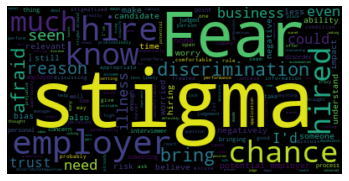

In [106]:
text3 = " ".join(i for i in Q1_N)
wordcloud3 = WordCloud(stopwords = stop2).generate(text3)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud3.png')
plt.show()

In [107]:
#define a function to remove punctuations and lemmatize words
#stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop2])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

#Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [108]:
#get a cleaned document
doc_clean_Q1N = [clean(doc).split() for doc in Q1_N]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q1N = corpora.Dictionary(doc_clean_Q1N)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q1N = [dictionary_Q1N.doc2bow(doc) for doc in doc_clean_Q1N]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q1N = Lda(doc_term_matrix_Q1N, num_topics=3, id2word = dictionary_Q1N, passes=50)

In [109]:
print(ldamodel_Q1N.print_topics(num_topics=3, num_words=5))

[(0, '0.024*"fear" + 0.016*"employer" + 0.015*"discrimination" + 0.015*"hired" + 0.013*"im"'), (1, '0.046*"stigma" + 0.011*"relevant" + 0.011*"negative" + 0.010*"issue" + 0.010*"seen"'), (2, '0.017*"employer" + 0.015*"business" + 0.013*"reason" + 0.013*"afraid" + 0.013*"potential"')]


In [110]:
type(df_N_mod)

pandas.core.series.Series

In [111]:
df_N = df_N_mod.to_frame()

In [112]:
df_N.to_csv('No Answers in Tech_Mental.csv', index=False)

In [113]:
df_N = df_N.dropna()
len(df_N)

634

In [114]:
df_N['Cleaned Answers'] = df_N['Why or why not_Mental?'].apply(cleanse)
df_N.head(5)

,Why or why not_Mental?,Cleaned Answers
0,I'd be worried they wouldn't hire me,I d be worried they wouldn t hire me
1,mental health issues are stigmatised and misun...,mental health issues are stigmatised and misun...
2,stigma,stigma
3,Might hurt my chances,Might hurt my chances
4,It wouldn't feel safe,It wouldn t feel safe


In [115]:
df_N['POS tagged'] = df_N['Cleaned Answers'].apply(token_stop_pos)
df_N.head(5)

,Why or why not_Mental?,Cleaned Answers,POS tagged
0,I'd be worried they wouldn't hire me,I d be worried they wouldn t hire me,"[(worried, v), (hire, n)]"
1,mental health issues are stigmatised and misun...,mental health issues are stigmatised and misun...,"[(issues, n), (stigmatised, v), (misunderstood..."
2,stigma,stigma,"[(stigma, n)]"
3,Might hurt my chances,Might hurt my chances,"[(Might, n), (hurt, v), (chances, n)]"
4,It wouldn't feel safe,It wouldn t feel safe,"[(feel, n), (safe, a)]"


In [116]:
df_N['Lemma'] = df_N['POS tagged'].apply(lemmatize)
df_N.head(5)

,Why or why not_Mental?,Cleaned Answers,POS tagged,Lemma
0,I'd be worried they wouldn't hire me,I d be worried they wouldn t hire me,"[(worried, v), (hire, n)]",worry hire
1,mental health issues are stigmatised and misun...,mental health issues are stigmatised and misun...,"[(issues, n), (stigmatised, v), (misunderstood...",issue stigmatise misunderstand many
2,stigma,stigma,"[(stigma, n)]",stigma
3,Might hurt my chances,Might hurt my chances,"[(Might, n), (hurt, v), (chances, n)]",Might hurt chance
4,It wouldn't feel safe,It wouldn t feel safe,"[(feel, n), (safe, a)]",feel safe


In [117]:
final_df2 = pd.DataFrame(df_N[['Why or why not_Mental?', 'Lemma']])

In [118]:
final_df2['Subjectivity'] = final_df2['Lemma'].apply(getSubjectivity)
final_df2['Polarity'] = final_df2['Lemma'].apply(getPolarity) 
final_df2['Analysis'] = final_df2['Polarity'].apply(analysis)
final_df2.head(5)

,Why or why not_Mental?,Lemma,Subjectivity,Polarity,Analysis
0,I'd be worried they wouldn't hire me,worry hire,0.0,0.0,Neutral
1,mental health issues are stigmatised and misun...,issue stigmatise misunderstand many,0.5,0.5,Positive
2,stigma,stigma,0.0,0.0,Neutral
3,Might hurt my chances,Might hurt chance,0.0,0.0,Neutral
4,It wouldn't feel safe,feel safe,0.5,0.5,Positive


In [119]:
tb_counts2 = final_df2.Analysis.value_counts()
tb_counts2

Neutral     346
Positive    152
Negative    136
Name: Analysis, dtype: int64

In [120]:
final_df2['Vader Sentiment'] = final_df2['Lemma'].apply(vadersentimentanalysis)
final_df2['Vader Analysis'] = final_df2['Vader Sentiment'].apply(vader_analysis)
final_df2.head(5)

,Why or why not_Mental?,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,I'd be worried they wouldn't hire me,worry hire,0.0,0.0,Neutral,-0.4404,Neutral
1,mental health issues are stigmatised and misun...,issue stigmatise misunderstand many,0.5,0.5,Positive,-0.3612,Neutral
2,stigma,stigma,0.0,0.0,Neutral,0.0000,Neutral
3,Might hurt my chances,Might hurt chance,0.0,0.0,Neutral,-0.3400,Neutral
4,It wouldn't feel safe,feel safe,0.5,0.5,Positive,0.4404,Neutral


In [121]:
vader_counts2 = final_df2['Vader Analysis'].value_counts()
vader_counts2

Neutral     525
Negative     62
Positive     47
Name: Vader Analysis, dtype: int64

In [122]:
final_df2['SWN analysis'] = df_N['POS tagged'].apply(sentiwordnetanalysis)
final_df2.head(5)

,Why or why not_Mental?,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,I'd be worried they wouldn't hire me,worry hire,0.0,0.0,Neutral,-0.4404,Neutral,Negative
1,mental health issues are stigmatised and misun...,issue stigmatise misunderstand many,0.5,0.5,Positive,-0.3612,Neutral,Positive
2,stigma,stigma,0.0,0.0,Neutral,0.0000,Neutral,Neutral
3,Might hurt my chances,Might hurt chance,0.0,0.0,Neutral,-0.3400,Neutral,Negative
4,It wouldn't feel safe,feel safe,0.5,0.5,Positive,0.4404,Neutral,Positive


In [123]:
swn_counts2= final_df2['SWN analysis'].value_counts()
swn_counts2

Neutral     304
Negative    176
Positive    125
Name: SWN analysis, dtype: int64

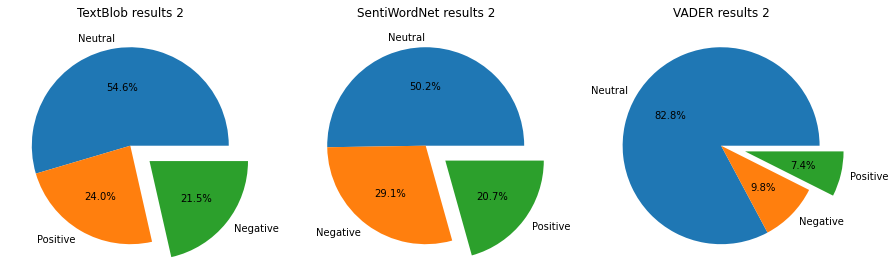

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results 2")
plt.pie(tb_counts2.values, labels = tb_counts2.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("SentiWordNet results 2")
plt.pie(swn_counts2.values, labels = swn_counts2.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("VADER results 2")
plt.pie(vader_counts2.values, labels = vader_counts2.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

#SpaCy

In [125]:
all_text_2 = df_N["Why or why not_Mental?"].str.cat(sep = ' ')

In [126]:
doc2 = nlp(all_text_2, disable = ['ner'])

In [129]:
from collections import Counter

words = [token.lemma_ for token in doc2 if not token.is_stop and not token.is_punct]
words = [word for word in words if word not in stop2]
word_freq = Counter(words) 
word_freq.most_common(20)

[(' ', 93),
 ('hire', 69),
 ('employer', 55),
 ('stigma', 54),
 ('bring', 43),
 ('know', 40),
 ('fear', 38),
 ('chance', 31),
 ('potential', 25),
 ('discrimination', 24),
 ('reason', 24),
 ('need', 23),
 ('afraid', 23),
 ('see', 23),
 ('business', 22),
 ('illness', 22),
 ('Stigma', 20),
 ('impact', 20),
 ('understand', 19),
 ('discuss', 19)]

In [130]:
from spacy.matcher import Matcher 

matcher = Matcher(nlp.vocab) 
pattern = [{'POS':'ADJ'}, {'POS':'NOUN'}] 
matcher.add('ADJ_PHRASE', [pattern]) 

matches = matcher(doc2, as_spans=True) 
phrases = [] 
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)

phrase_freq.most_common(10)

[('mental health', 114),
 ('mental illness', 15),
 ('potential employer', 12),
 ('physical health', 9),
 ('same reason', 8),
 ('potential employers', 7),
 ('much stigma', 5),
 ('physical issues', 5),
 ('mental issues', 5),
 ('red flag', 3)]

In [131]:
feel_adj = []
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER' : {'IN' : ['i', 'we']}}, {'OP': '?'}, 
  {'LOWER': {'IN' : ['feel', 'am', "'m", 'are', "'re"]}}, 
  {'OP': '?'}, {'OP': '?'}, {'POS':'ADJ'}]
matcher.add("FeelAdj", [pattern]) 
matches = matcher(doc2, as_spans=True) 
for span in matches:
    feel_adj.extend([token.lemma_ for token in span if token.pos_ == 'ADJ'])
Counter(feel_adj).most_common(20)

[('afraid', 5),
 ('crazy', 4),
 ('comfortable', 3),
 ('worried', 3),
 ('uncomfortable', 2),
 ('mental', 2),
 ('red', 1),
 ('certain', 1),
 ('positive', 1),
 ('legal', 1),
 ('aware', 1),
 ('interesting', 1),
 ('many', 1),
 ('overdramatic', 1),
 ('least', 1),
 ('likely', 1),
 ('lazy', 1),
 ('anxious', 1),
 ('disabled', 1),
 ('willing', 1)]

In [134]:
from spacy.matcher import PhraseMatcher
mental_health_colloc = []
matcher = PhraseMatcher(nlp.vocab, attr = 'LOWER') 
# The attr above ensures all instances are converted to lower-case so the search is case-insensitive
pattern = [nlp.make_doc("mental health")]
matcher.add("mental health", pattern) 
matches = matcher(doc2)
for match_id, start, end in matches:
    span = doc2[start-10 : end+10]   
    mental_health_colloc.extend([token.lemma_.lower() for token in span if not token.is_stop and not token.is_punct]) 
Counter(mental_health_colloc).most_common(20)

[('mental', 122),
 ('health', 122),
 ('issue', 73),
 ('stigma', 31),
 (' ', 20),
 ('bring', 17),
 ('interview', 17),
 ('employer', 17),
 ('job', 16),
 ('hire', 15),
 ('want', 15),
 ('feel', 13),
 ('affect', 13),
 ('work', 12),
 ('physical', 12),
 ('discuss', 12),
 ('know', 11),
 ('think', 11),
 ('like', 10),
 ('understand', 8)]